## "Text Classification with Keras"

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
#nltk.download('stopwords')

### 1) Read in the movie review data from Cornell CS department. Carry out the EDA. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [4]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data') 
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [5]:
len(my_docs)

2000

In [6]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

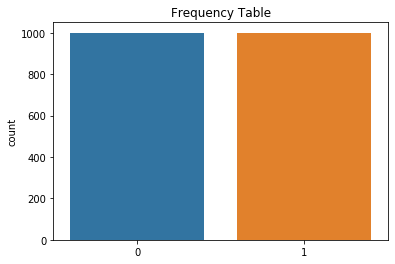

In [7]:
sns.countplot(y).set_title("Frequency Table")
plt.show()

### 2) Carry out the data preprocessing: <br>
- Cleaning.
- Stopword removal.

In [8]:
# Cleaning.
corpus = []
for i in range(0, len(my_docs)):
    review = str(my_docs[i]).lower()
    review = re.sub(r'\W', ' ', review)
    review = re.sub(r'\d+', ' ', review)
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [ ]:
# Stopword removal.
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [x for x in words if x not in stopwords.words('english')]
    corpus[i] = ' '.join(words) 
    if (i % 100 == 0): print(i)

### 3) Carry out label encoding by integers (required form by Keras):

In [ ]:
# Make a dictionary with the top words.
n_words = 2000  
words = []
for i in range(len(corpus)):
    words += nltk.word_tokenize(corpus[i])
top_words = pd.Series(words).value_counts().index
top_words = top_words[0:n_words]                     # Apply a limitation.
my_dict = {}
my_dict_inv = {}
for i in range(len(top_words)):
    my_dict_inv[i] = top_words[i]                    
    my_dict[top_words[i]] = i                        

In [ ]:
# Convert the corpus into the label encoded form.
corpus_int =[]
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words2int = []
    for x in words:
        if x in my_dict:
            words2int += [my_dict[x]]
    corpus_int.append(words2int)

### 4) Prepare the data for AI: <br>
- Apply the padding.
- Split the data into training and testing.

In [ ]:
X = np.array(corpus_int)
y = np.array(y)

In [ ]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X = sequence.pad_sequences(X, maxlen = 100)

In [ ]:
# y is already binary. Thus, there is no need to covert to the one-hot-encoding scheme.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 5) Define the AI model (Embedding + LSTM):

In [ ]:
n_neurons = 100                    # Neurons within each memory cell.
n_input = 500                     # Dimension of the embeding space. 

In [ ]:
my_model = Sequential()
my_model.add(Embedding(n_words,n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# View the summary.
my_model.summary()

### 6) Define the optimizer and compile the model:

In [ ]:
n_epochs = 15                      # Number of epochs.
batch_size = 100                    # Size of each batch.
learn_rate = 0.0001                 # learning rate.  

In [ ]:
# Optimizer and compilation.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "binary_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

### 7) Train the model and visualize the summary:

In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

In [ ]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### 8) Display the test result (accuracy):

In [ ]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))